In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import os
import seaborn as sb


In [2]:


def compute_ordering(sim_mat):
    """
    Compute the ordering of the models in the similarity matrix based on the average linkage clustering.
    """
    if not isinstance(sim_mat, pd.DataFrame):
        sim_mat = pd.DataFrame(sim_mat)
    dist_mat = sim_mat.values
    upper_tri_indices = np.triu_indices_from(dist_mat, k=1)
    linkage_matrix = linkage(dist_mat[upper_tri_indices], method='average')
    idx_new = np.array(dendrogram(linkage_matrix)['leaves'])
    plt.close()
    return idx_new

def get_model_ids(fn):
    """
    Load model ids from file.
    Args:
        fn: Path to file containing model ids.
    Returns:
        List of model ids.
    """
    with open(fn, 'r') as file:
        lines = file.readlines()
    lines = [line.strip() for line in lines]
    return lines



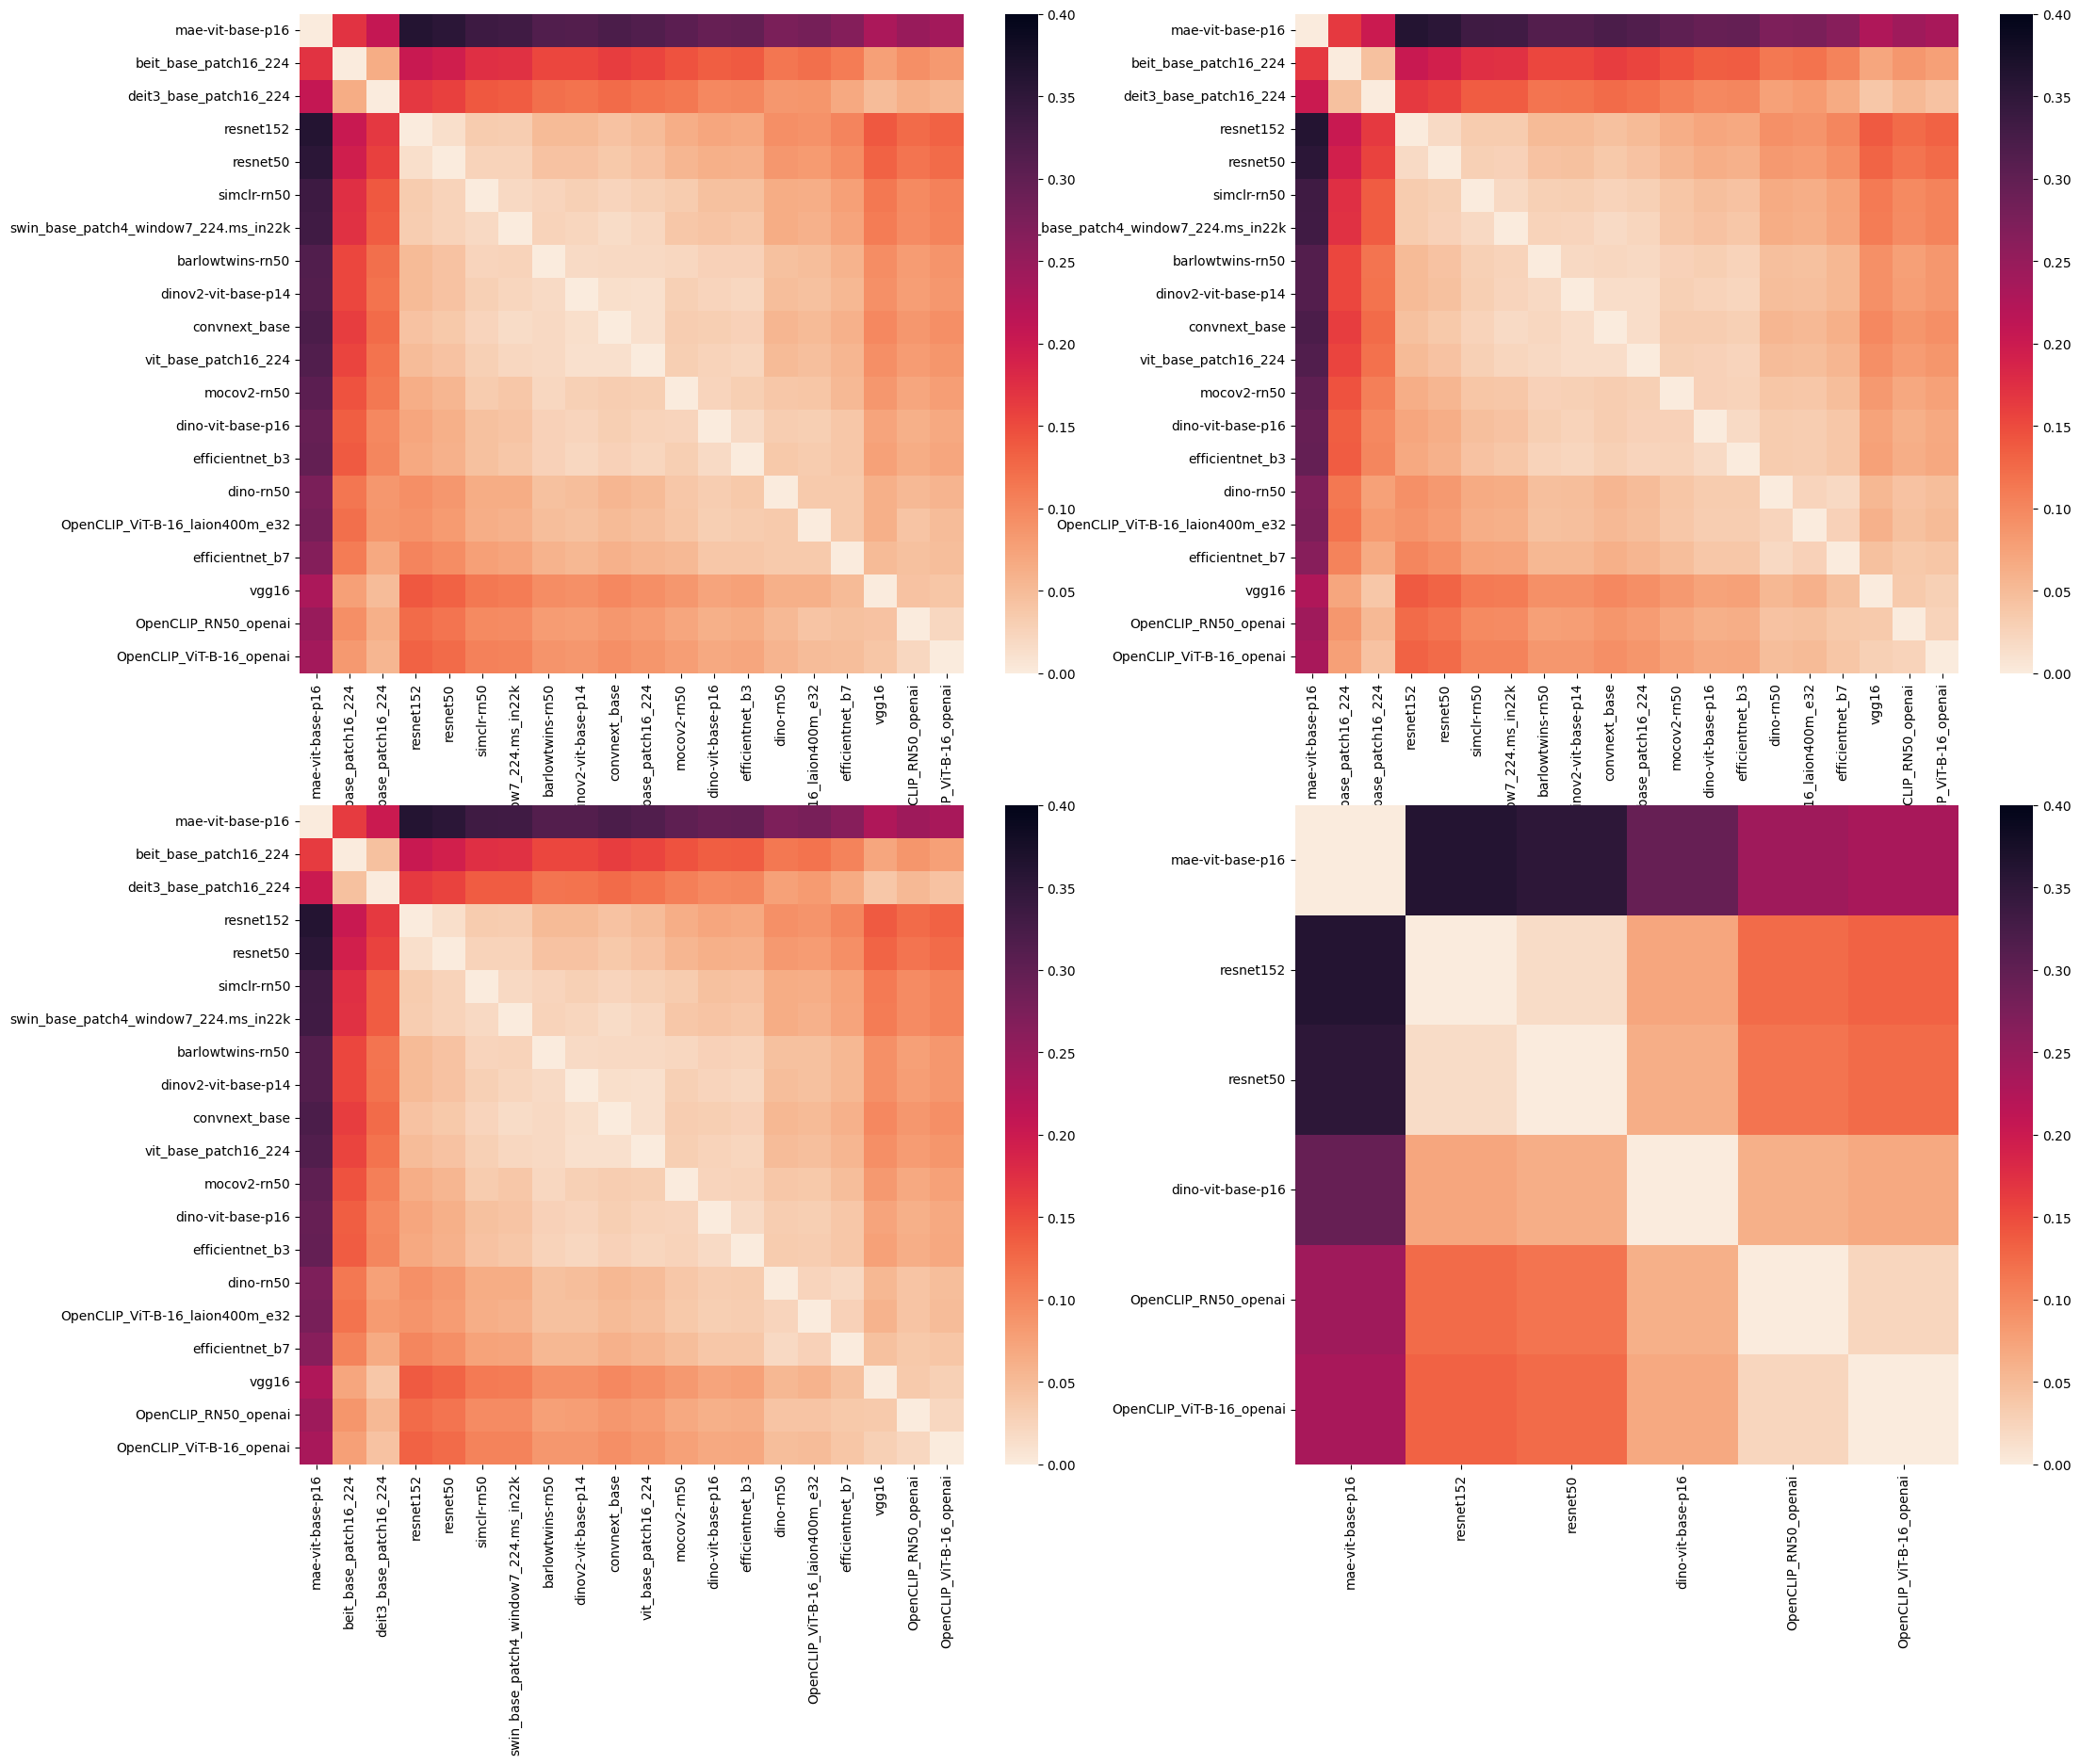

In [3]:

folder = "gw_sim_fixed_coupling_cost_euclidean_loss_fun_square_loss"
folder_gwd = "gw_sim_full_gromov_cost_euclidean_loss_fun_square_loss"
folder_gwd_cosine = "gw_sim_full_gromov_cost_cosine_loss_fun_square_loss"
folder_gwd_ip = "gw_sim_full_gromov_identityprior_cost_euclidean_loss_fun_square_loss"
folder_gwd_shuffle = "gw_sim_Shuffled_full_gromov_cost_euclidean_loss_fun_square_loss"
fixed = torch.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder}/similarity_matrix.pt")
fixed_id = get_model_ids(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder}/model_ids.txt")
gwd = torch.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/similarity_matrix.pt")
gwd_ip = torch.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_ip}/similarity_matrix.pt")
gwd_id = get_model_ids(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/model_ids.txt")
gwd_cosine = torch.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_cosine}/similarity_matrix.pt")

gwd_shuffle = torch.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_shuffle}/similarity_matrix.pt")
gwd_shuffle_id = get_model_ids(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_shuffle}/model_ids.txt")

ordering = compute_ordering(fixed)
ordering_small = compute_ordering(gwd_shuffle)
fixed_df = pd.DataFrame(fixed,index=fixed_id, columns=fixed_id).iloc[ordering,ordering]
gwd_df = pd.DataFrame(gwd,index=gwd_id, columns=gwd_id).iloc[ordering,ordering]
gwd_ip_df = pd.DataFrame(gwd_ip,index=gwd_id, columns=gwd_id).iloc[ordering,ordering]
#diff_df = pd.DataFrame(gwd-fixed, index=gwd_id, columns=gwd_id).iloc[ordering,ordering]
gwd_cosine_df = pd.DataFrame(gwd_cosine, index=gwd_id, columns=gwd_id).iloc[ordering,ordering]

gwd_shuffle_df = pd.DataFrame(gwd_shuffle, index=gwd_shuffle_id, columns=gwd_shuffle_id).iloc[ordering_small,ordering_small]
fig, ax = plt.subplots(2,2,figsize=(25,20))
g = sb.heatmap(fixed_df, ax=ax[0,0],  vmin=0, vmax=0.4, cbar=True,cmap="rocket_r")
g = sb.heatmap(gwd_df, ax=ax[0,1],  vmin=0, vmax=0.4, cbar=True,cmap="rocket_r")
g = sb.heatmap(gwd_ip_df, ax=ax[1,0],  vmin=0, vmax=0.4, cbar=True,cmap="rocket_r")
g = sb.heatmap(gwd_shuffle_df, ax=ax[1,1],  vmin=0, vmax=0.4, cbar=True,cmap="rocket_r")
#g = sb.heatmap(diff_df, ax=ax[1,1],  cbar=True,cmap="rocket_r")
plt.show()

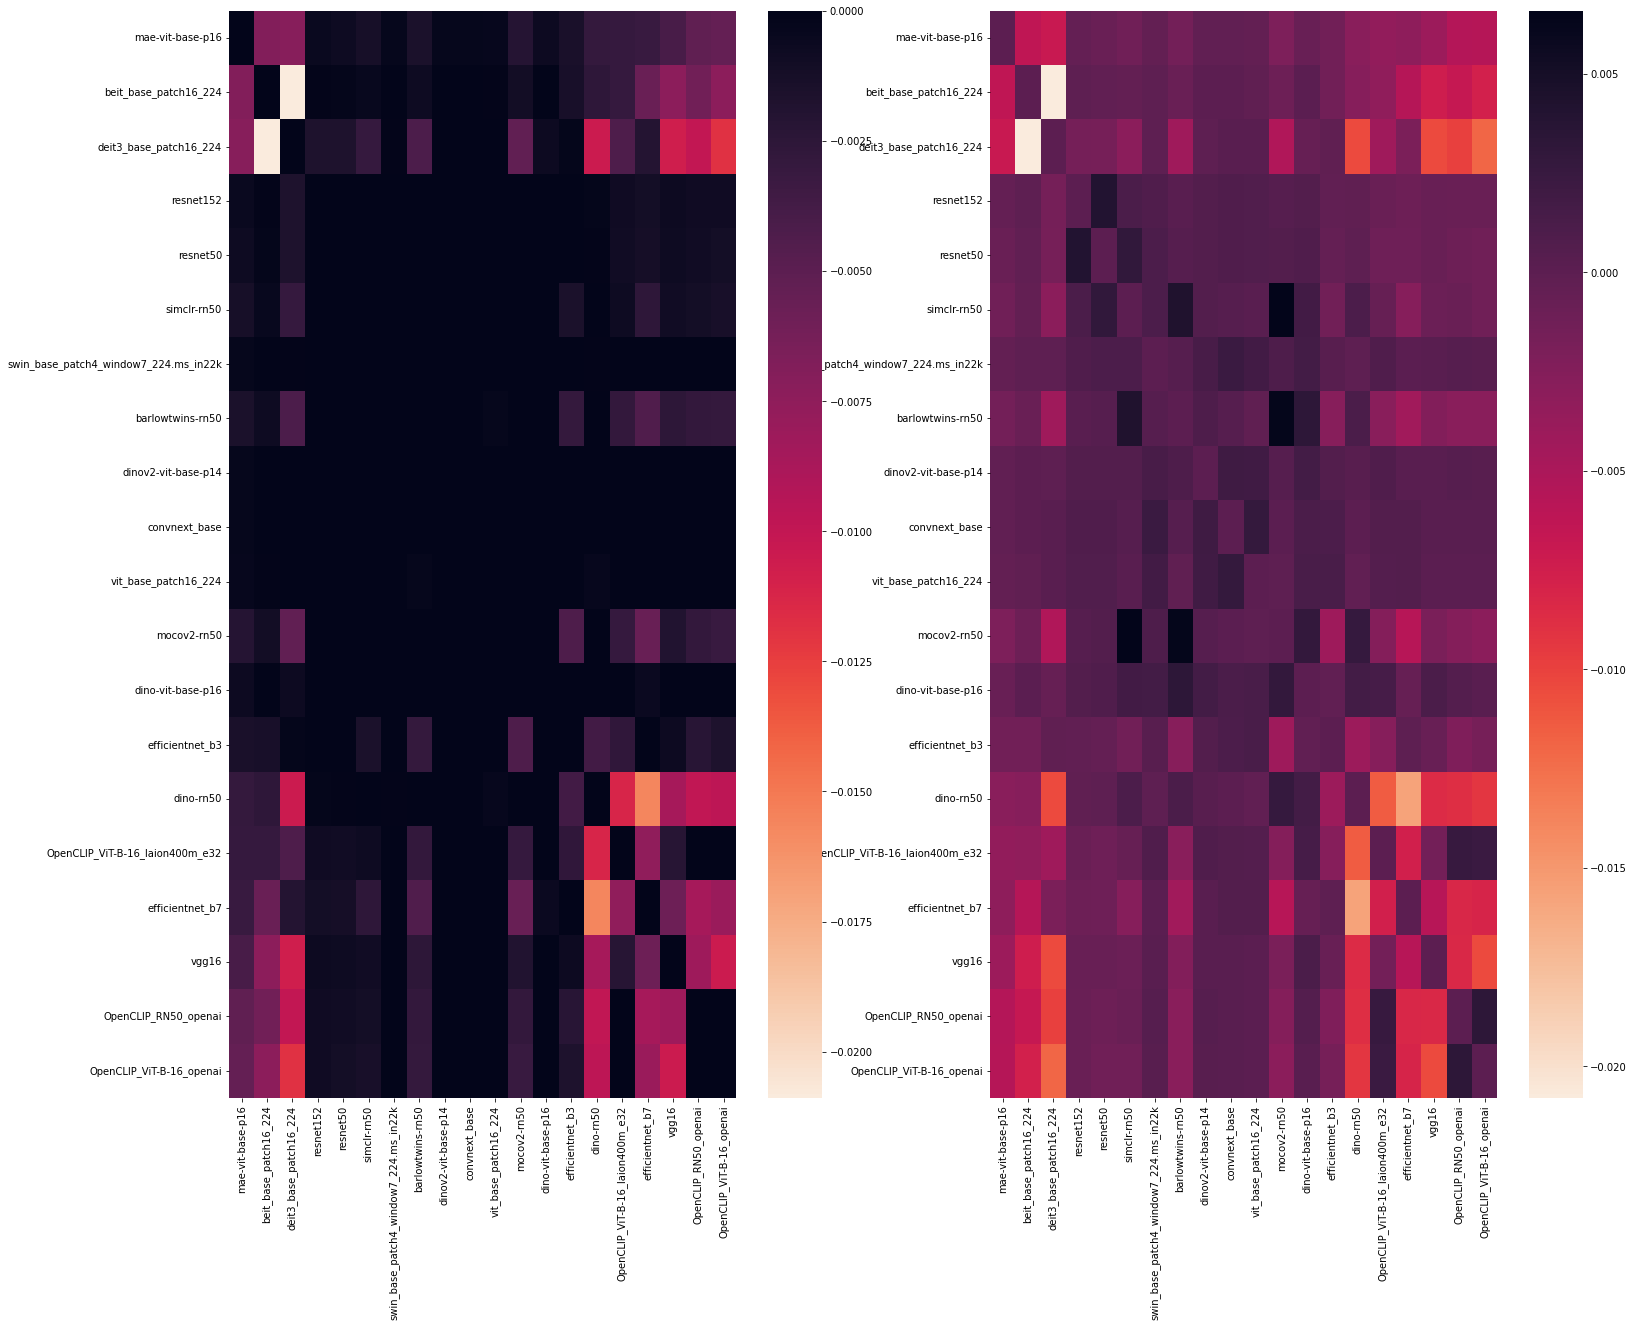

In [6]:
fig, ax = plt.subplots(1,2,figsize=(25,20))
g = sb.heatmap(gwd_ip_df-fixed_df, ax=ax[0], cbar=True,cmap="rocket_r")
g = sb.heatmap(gwd_df-fixed_df, ax=ax[1], cbar=True,cmap="rocket_r")


In [ ]:

folder = "gw_sim_fixed_coupling_cost_euclidean_loss_fun_square_loss"
folder_gwd = "gw_sim_full_gromov_cost_euclidean_loss_fun_square_loss"
fixed = torch.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder}/similarity_matrix.pt")
fixed_id = get_model_ids(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder}/model_ids.txt")
gwd = torch.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/similarity_matrix.pt")
gwd_id = get_model_ids(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/model_ids.txt")

ordering = compute_ordering(fixed)

fixed_df = pd.DataFrame(fixed,index=fixed_id, columns=fixed_id).iloc[ordering,ordering]
gwd_df = pd.DataFrame(gwd,index=gwd_id, columns=gwd_id).iloc[ordering,ordering]
diff_df = pd.DataFrame(gwd-fixed, index=gwd_id, columns=gwd_id).iloc[ordering,ordering]
fig, ax = plt.subplots(1,3,figsize=(35,10))
g = sb.heatmap(fixed_df, ax=ax[0],  vmin=0, vmax=0.4, cbar=True,cmap="rocket_r")
g = sb.heatmap(gwd_df, ax=ax[1],  vmin=0, vmax=0.4, cbar=True,cmap="rocket_r")
g = sb.heatmap(diff_df, ax=ax[2],  cbar=True,cmap="rocket_r")
plt.show()

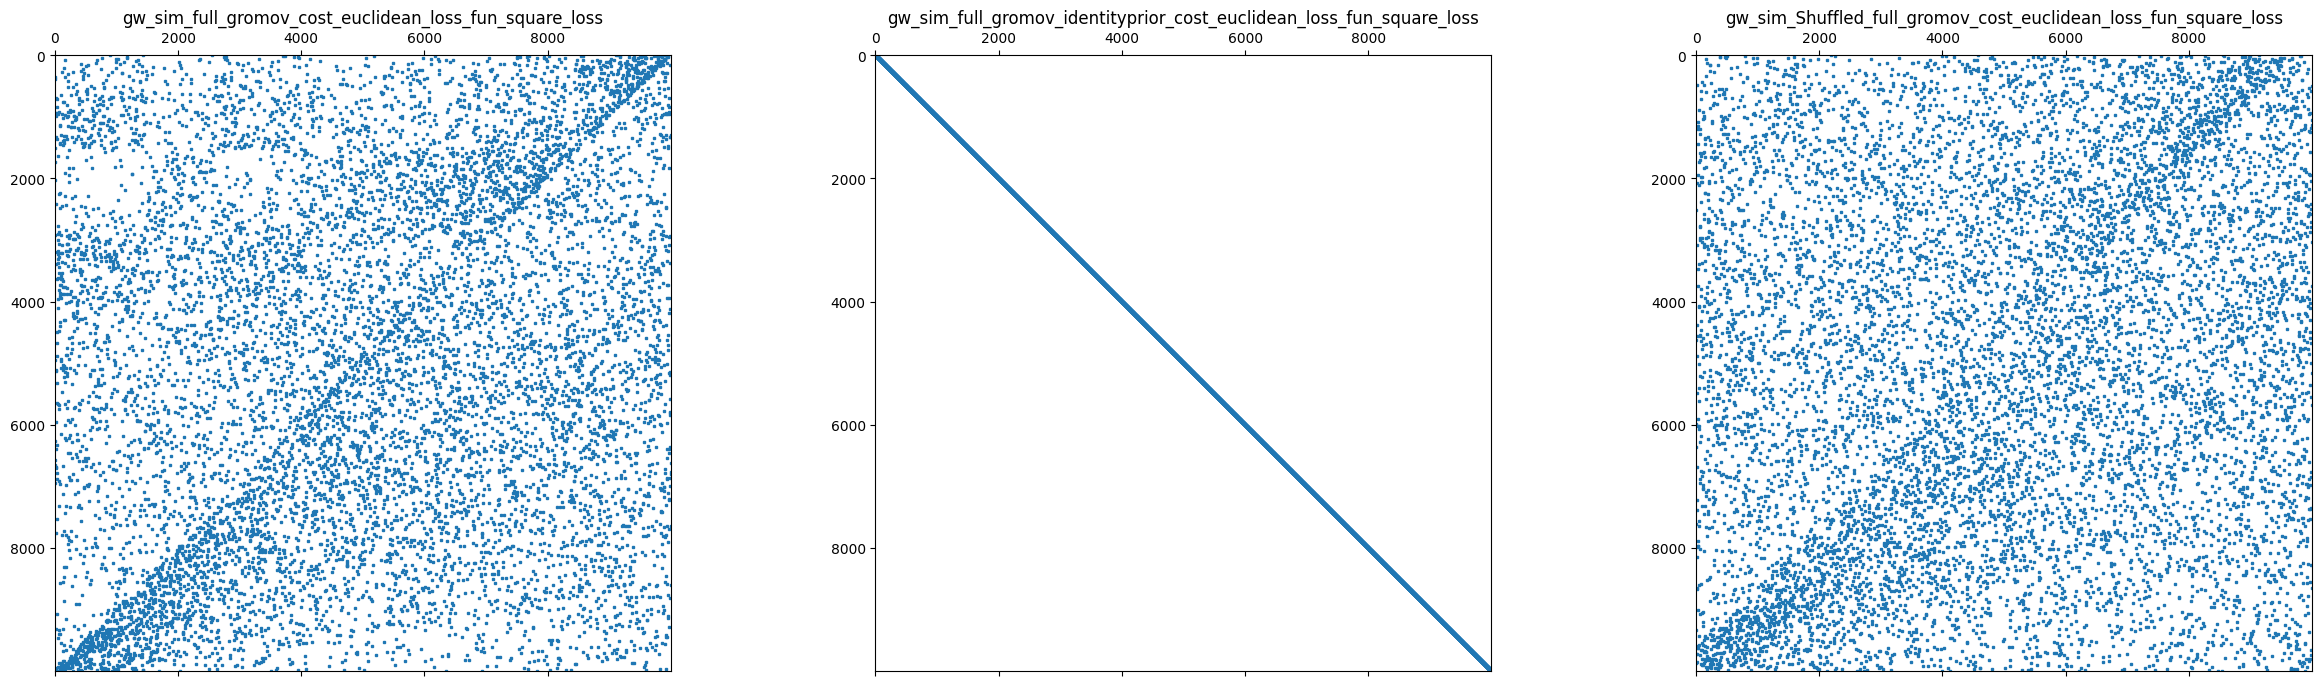

In [6]:
def plot_coupling(m1,m2, folder):
    fig, ax = plt.subplots(1,len(folder),figsize=(10*len(folder),8))
    for i,f in enumerate(folder):
        try:
            coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{f}/{m1}_{m2}_coupling.npy",allow_pickle=True)            
        except:
            coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{f}/{m2}_{m1}_coupling.npy",allow_pickle=True)
            
        ax[i].spy(coupling,markersize=2)
        ax[i].set_title(f)
    return coupling

        
m1 = "resnet152"
m2 ="resnet50" #  "vit_base_patch16_224" # 
c = plot_coupling(m1,m2,[folder_gwd,folder_gwd_ip,folder_gwd_shuffle])
#coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/{m1}_{m2}_coupling.npy",allow_pickle=True)
#plt.spy(coupling,markersize=2)

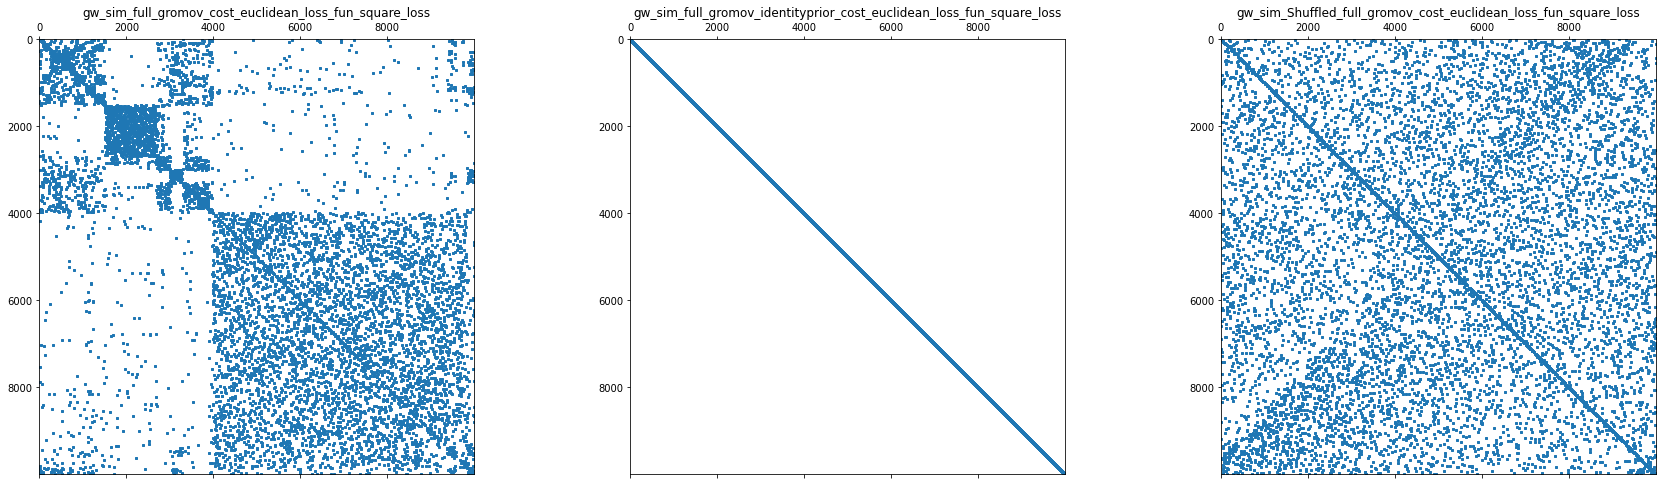

In [12]:
m1 = "OpenCLIP_RN50_openai"
m2 ="OpenCLIP_ViT-B-16_openai" #  "vit_base_patch16_224" # 
plot_coupling(m1,m2,[folder_gwd,folder_gwd_ip,folder_gwd_shuffle])
#coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_shuffle}/{m1}_{m2}_coupling.npy",allow_pickle=True)
#plt.spy(coupling,markersize=2)

0.04424625890349865 0.04415635930803872


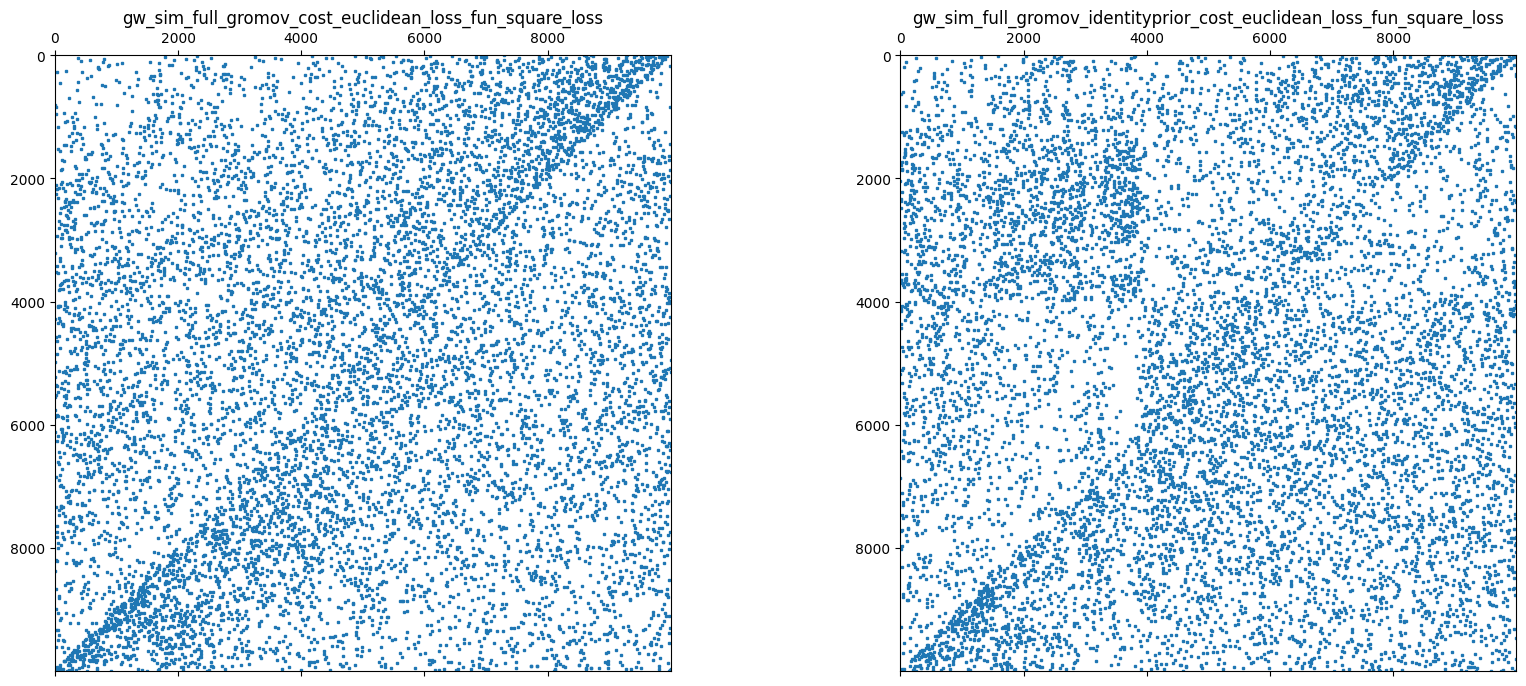

In [49]:
m1 = "beit_base_patch16_224"
m2 = "deit3_base_patch16_224"
plot_coupling(m1,m2,[folder_gwd,folder_gwd_ip])
print(gwd_df.loc[m1,m2], gwd_ip_df.loc[m1,m2])

['OpenCLIP_RN50_openai',
 'OpenCLIP_ViT-B-16_openai',
 'dino-vit-base-p16',
 'mae-vit-base-p16',
 'resnet152',
 'resnet50']

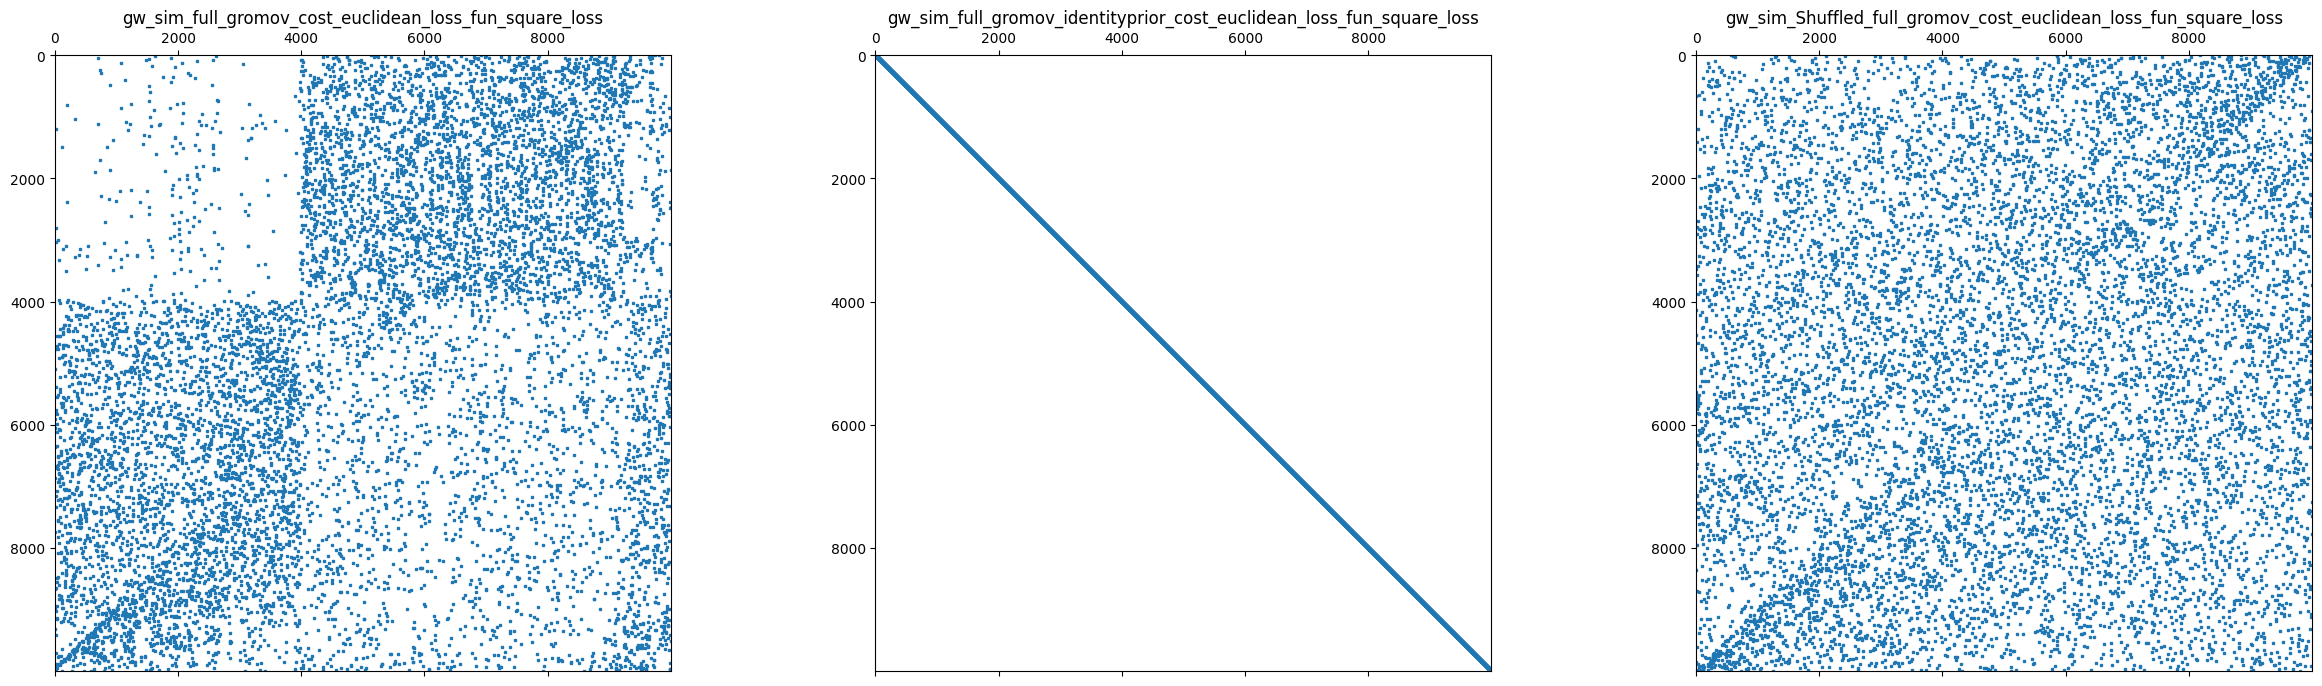

In [7]:
m1 = "dino-vit-base-p16"
m2 ="OpenCLIP_ViT-B-16_openai" #  "vit_base_patch16_224" # 
c = plot_coupling(m1,m2,[folder_gwd,folder_gwd_ip,folder_gwd_shuffle])
gwd_shuffle_id

In [41]:
def load_and_normalize(m,mode="eucl"):
    
    features_root = "/home/mmorik/gwsim_data/features/imagenet-subset-10k/"
    split = "train"
    features_m = torch.load(os.path.join(features_root,m, f'features_{split}.pt')).numpy()
    if mode=="eucl":
        squared_sum = np.sum(features_m ** 2, axis=1, keepdims=True)  # Shape: (n_samples, 1)
        C_mat = np.sqrt(np.maximum(squared_sum + squared_sum.T - 2 * np.dot(features_m, features_m.T), 0))
        
    elif mode == "cosine":
        features_m /= np.linalg.norm(features_m, axis=1, keepdims=True)
        C_mat = 1 - np.dot(features_m, features_m.T)
    elif mode == "cdist":
        C_mat = cdist(features_m, features_m)
    C_mat /= C_mat.max()
    return C_mat



In [47]:
m1 = "deit3_base_patch16_224"
dist1 = load_and_normalize(m1)
dist2 = load_and_normalize(m1,"cdist")
print(np.max((dist1-dist2)**2),np.mean((dist1-dist2)**2), np.mean(dist1))

5.985683859816016e-07 6.279915070790214e-12 0.6519535


4.072807023116158e-07 0.8381906


In [36]:
gwd_df.loc[m1,m2], gwd_ip_df.loc[m1,m2], 0.06756512883525835

(0.06777905192567997, 0.06756507286142893)

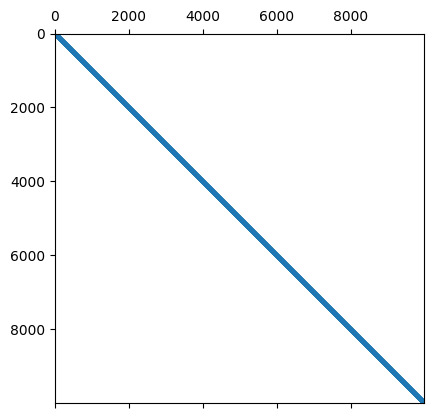

In [38]:
coupling_id = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_ip}/{m2}_{m1}_coupling.npy",allow_pickle=True)*10000
plt.spy(coupling_id,markersize=2)

(10000, 10000) (10000, 10000)


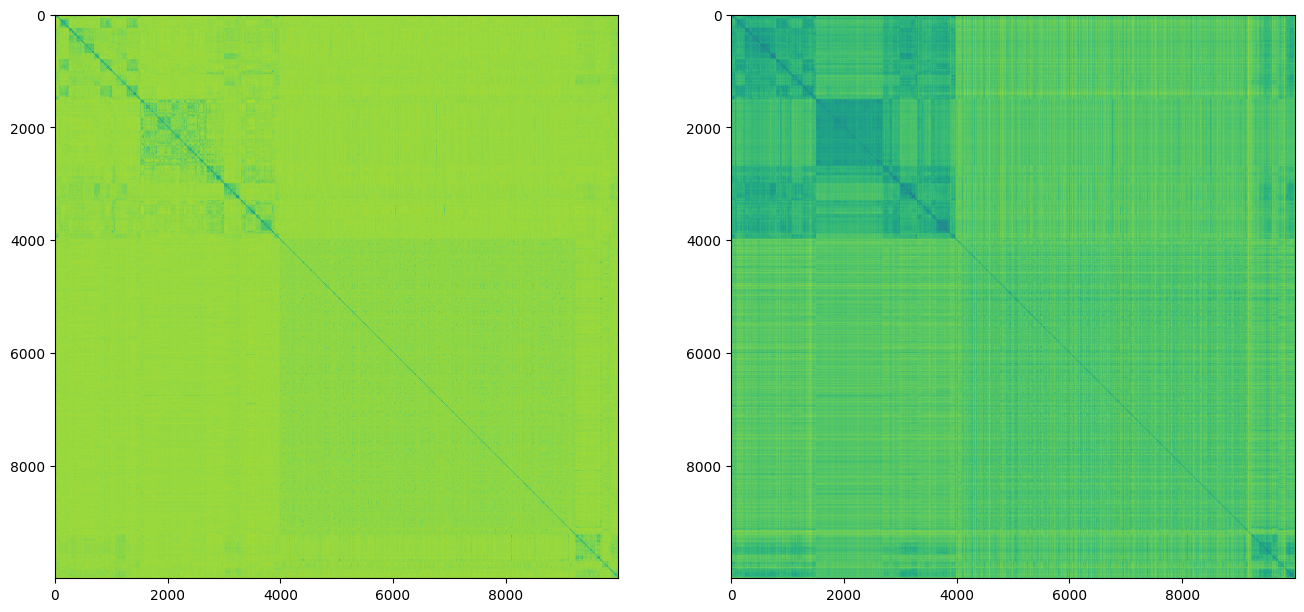

0.06756512883525835 0.07100418404155828 0.0707330511313476 0.07073307088143112 0.0710040725516763


In [33]:

m1 = "dino-vit-base-p16"
m2 ="OpenCLIP_ViT-B-16_openai" 
f1 = load_and_normalize(m1)
f2 = load_and_normalize(m2)

print(f1.shape,f2.shape)
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(f1)
ax[1].imshow(f2)
plt.show()
ws_compute = lambda f1,f2: 0.5 * np.mean((f1 - f2) ** 2)** 0.5
wasserstein_identity = ws_compute(f1,f2)
coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/{m2}_{m1}_coupling.npy",allow_pickle=True)*10000
wasserstein_1 = ws_compute(f1,np.dot(coupling,f2))
wasserstein_2 = ws_compute(f1,np.dot(f2,coupling))
wasserstein_3 = ws_compute(np.dot(coupling,f1),f2)
wasserstein_4 = ws_compute(np.dot(f1,coupling),f2)
print(wasserstein_identity,wasserstein_1,wasserstein_2,wasserstein_3,wasserstein_4)

(10000, 10000) (10000, 10000)


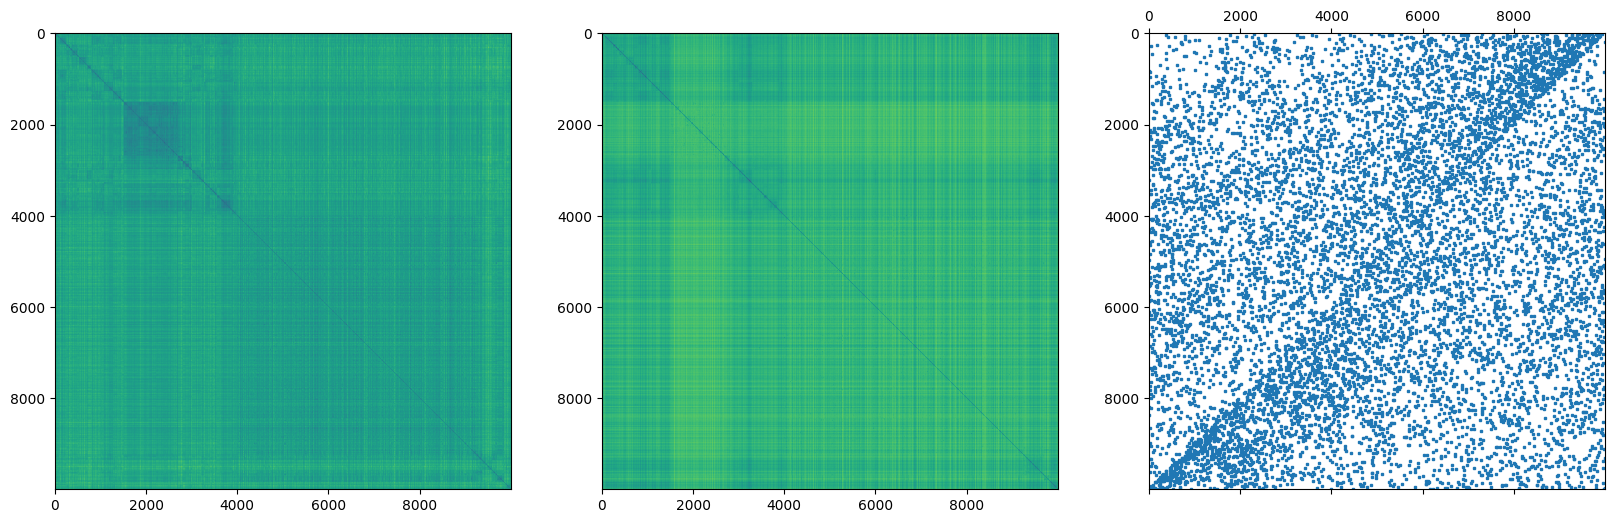

0.0650458141923531 0.05674486392929695 0.06257240378197304 0.0625724372707813 0.056744839310607816


In [16]:
m1 = "beit_base_patch16_224"
m2 = "deit3_base_patch16_224"
f1 = load_and_normalize(m1)
f2 = load_and_normalize(m2)
coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/{m1}_{m2}_coupling.npy",allow_pickle=True)*10000

print(f1.shape,f2.shape)
fig, ax = plt.subplots(1,3,figsize=(20,8))
ax[0].imshow(f1)
ax[1].imshow(f2)
ax[2].spy(coupling,markersize=2)
plt.show()
ws_compute = lambda f1,f2: 0.5 * np.mean((f1 - f2) ** 2)** 0.5
wasserstein_identity = ws_compute(f1,f2)
wasserstein_1 = ws_compute(f1,np.dot(coupling,f2))
wasserstein_2 = ws_compute(f1,np.dot(f2,coupling))
wasserstein_3 = ws_compute(np.dot(coupling,f1),f2)
wasserstein_4 = ws_compute(np.dot(f1,coupling),f2)
print(wasserstein_identity,wasserstein_1,wasserstein_2,wasserstein_3,wasserstein_4)

In [32]:
gwd_df.loc[m1,m2]

0.04424625890349865

(10000, 10000) (10000, 10000)


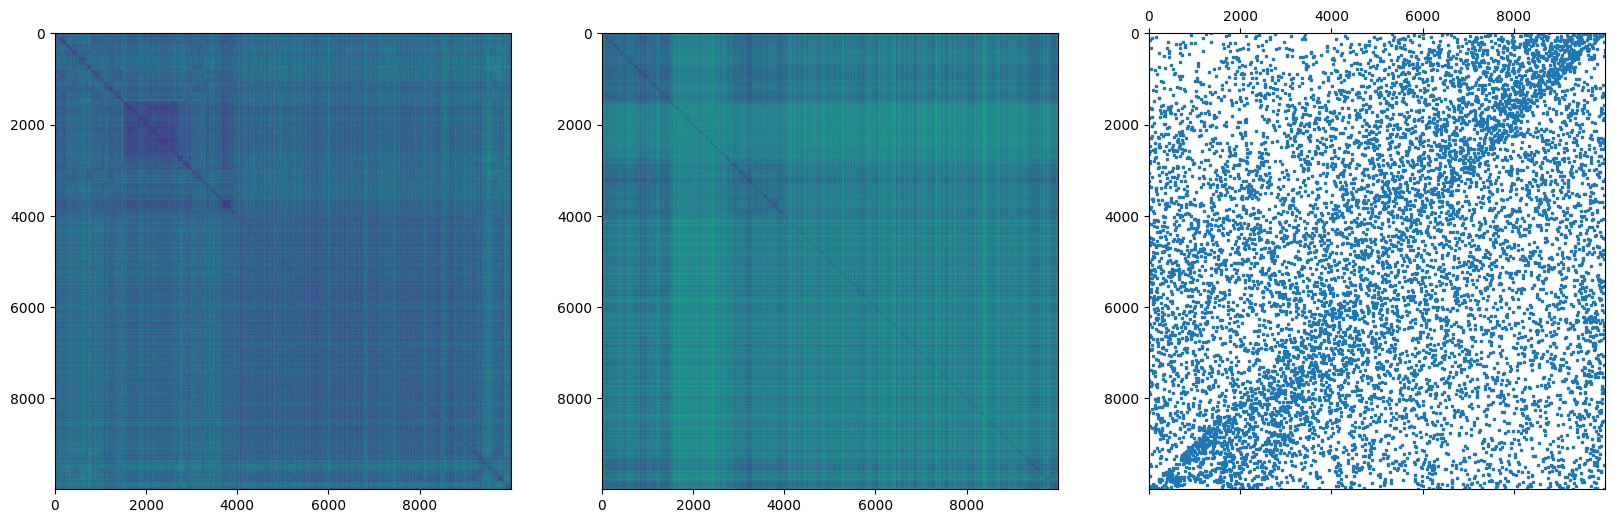

0.08058804308183316 0.06971690127013193 0.07719156411896434 0.07719153998879595 0.0697168545148969


In [20]:
m1 = "beit_base_patch16_224"
m2 = "deit3_base_patch16_224"
f1 = load_and_normalize(m1,False)
f2 = load_and_normalize(m2,False)
coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_cosine}/{m1}_{m2}_coupling.npy",allow_pickle=True)*10000

print(f1.shape,f2.shape)
fig, ax = plt.subplots(1,3,figsize=(20,8))
ax[0].imshow(f1)
ax[1].imshow(f2)
ax[2].spy(coupling,markersize=2)
plt.show()
ws_compute = lambda f1,f2: 0.5 * np.mean((f1 - f2) ** 2)** 0.5
wasserstein_identity = ws_compute(f1,f2)
wasserstein_1 = ws_compute(f1,np.dot(coupling,f2))
wasserstein_2 = ws_compute(f1,np.dot(f2,coupling))
wasserstein_3 = ws_compute(np.dot(coupling,f1),f2)
wasserstein_4 = ws_compute(np.dot(f1,coupling),f2)
print(wasserstein_identity,wasserstein_1,wasserstein_2,wasserstein_3,wasserstein_4)

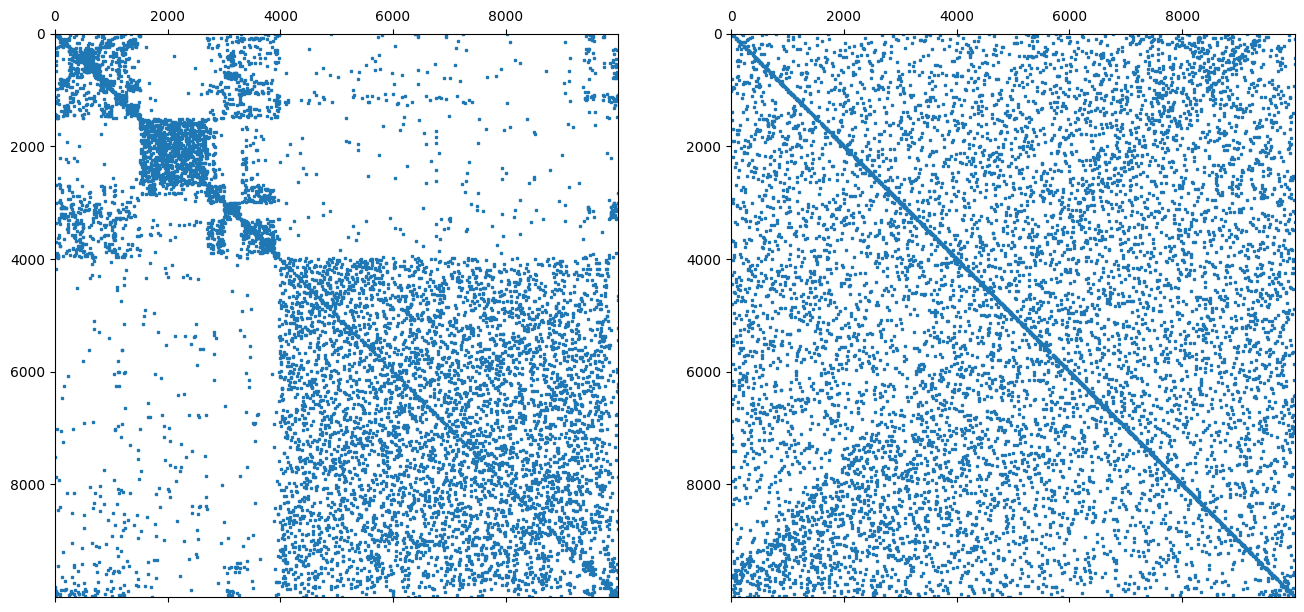

In [9]:
m1 = "OpenCLIP_RN50_openai"
m2 = "OpenCLIP_ViT-B-16_openai"

coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/{m1}_{m2}_coupling.npy",allow_pickle=True)
coupling_shuffle = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_shuffle}/{m1}_{m2}_coupling.npy",allow_pickle=True)
fig, ax = plt.subplots(1,2,figsize=(16,10))
ax[0].spy(coupling,markersize=2)
ax[1].spy(coupling_shuffle,markersize=2)

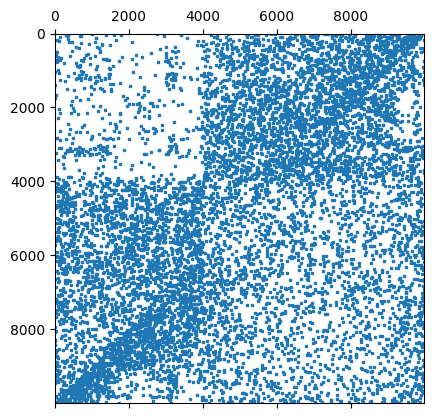

In [37]:
m1 = "barlowtwins-rn50"
m2 = "simclr-rn50" #"dino-rn50"
coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/{m1}_{m2}_coupling.npy",allow_pickle=True)
plt.spy(coupling,markersize=2)

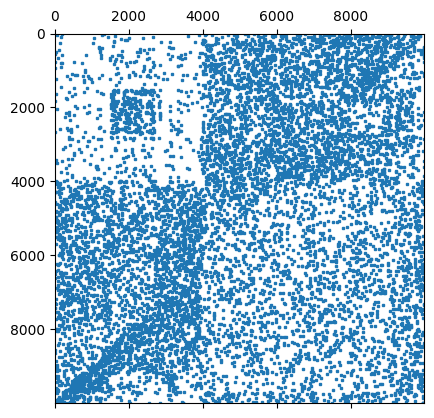

In [38]:
m1 = "OpenCLIP_RN50_openai"
m2 = "simclr-rn50" #"dino-rn50"
coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/{m1}_{m2}_coupling.npy",allow_pickle=True)
plt.spy(coupling,markersize=2)

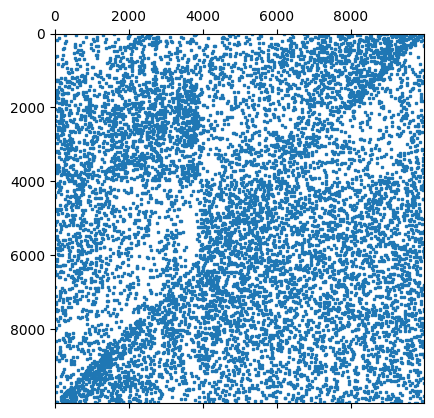

In [7]:
m1 = "beit_base_patch16_224"
m2 = "deit3_base_patch16_224"
#m2 = "vit_base_patch16_224"
coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_ip}/{m1}_{m2}_coupling.npy",allow_pickle=True)
plt.spy(coupling,markersize=2)

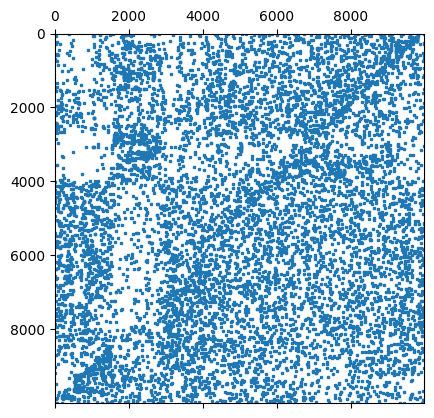

In [52]:

m1 = "dino-vit-base-p16"
m2 = "efficientnet_b3" # "dinov2-vit-base-p14"
coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/{m1}_{m2}_coupling.npy",allow_pickle=True)
plt.spy(coupling,markersize=2)

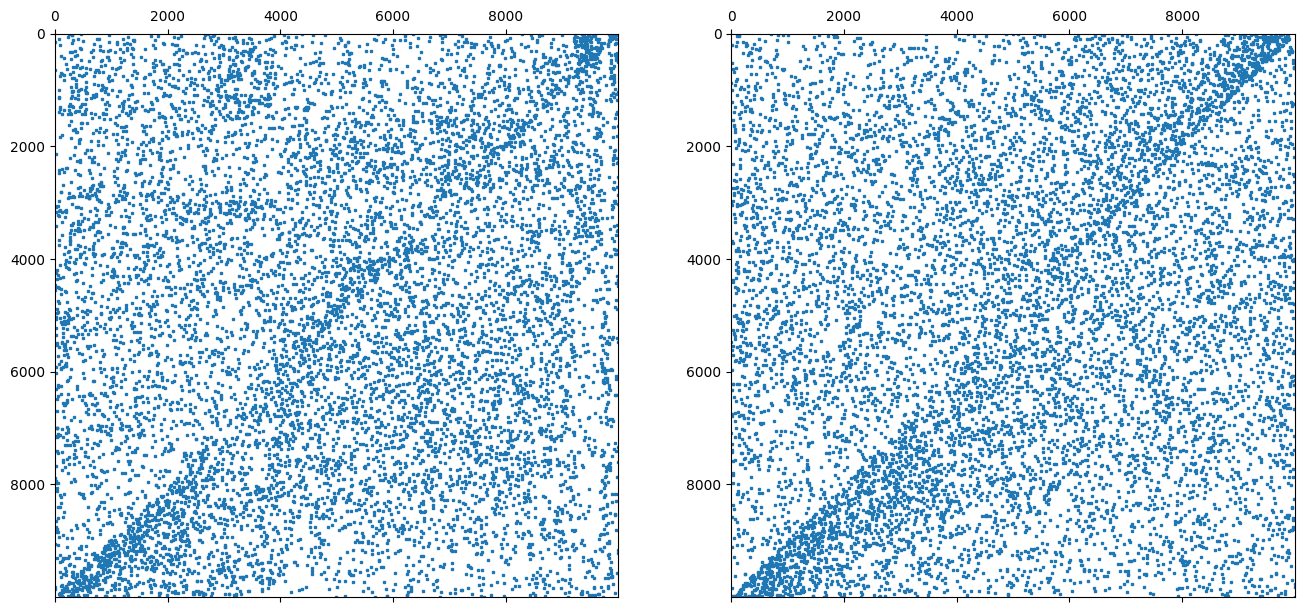

In [14]:
m2 = "mae-vit-base-p16"
m1 = "dino-vit-base-p16"
coupling = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd}/{m1}_{m2}_coupling.npy",allow_pickle=True)
coupling_shuffle = np.load(f"/home/mmorik/gwsim_data/model_similarities/imagenet-subset-10k/{folder_gwd_shuffle}/{m1}_{m2}_coupling.npy",allow_pickle=True)
fig, ax = plt.subplots(1,2,figsize=(16,10))
ax[0].spy(coupling,markersize=2)
ax[1].spy(coupling_shuffle,markersize=2)

In [70]:
a = np.ones(100)/100.
b = np.ones(100)/100.

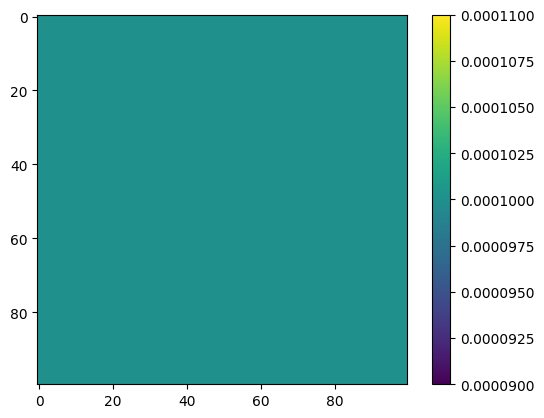

In [71]:
plt.imshow(np.outer(a,b))
plt.colorbar()

In [ ]:
def _compute_cdist_efficiently(C1: np.ndarray) -> np.ndarray:
    squared_sum = np.sum(C1 ** 2, axis=1, keepdims=True)  # Shape: (n_samples, 1)
    distances = np.sqrt(np.maximum(squared_sum + squared_sum.T - 2 * np.dot(C1, C1.T), 0))
    return distances
from 
features = load_features(self.feature_root, model_id, self.split, self.subset_indices).numpy()
C_mat = self._compute_cdist_efficiently(features)
        C_mat /= C_mat.max()
        return C_mat